<a href="https://colab.research.google.com/github/kev1092/Lab2-CV-course-HH/blob/main/Lab_2_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/kev1092/Lab2-CV-course-HH

fatal: destination path 'Lab2-CV-course-HH' already exists and is not an empty directory.


In [2]:
!pip install opencv-contrib-python==4.4.0.44

# we need to install a more updated version of opencv in order to use sift here

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Lab 2: Feature Extraction

In computer vision, feature extraction refers to the process of compressing/abstracting the information from a given image into a reduced vector form, called feature vector.

In this lab, we will focus on object recognition applications. Virtually any object recognition application would do feature extraction in order to understand the content of the image and generate a useful set of features able to describe it as best as possible. This feature vector can then be used to recognize and identify objects in a much easier way than doing direct pixel comparison.

There are many different algorithms to do feature extraction, depending on the type of features that it focus on, texture, color, shape... etc. If it describes the image as a whole or just local information, or just different strategies for the same goal.

In this lab we will focus on two different types of feature extraction algorithms, local and global descriptors.e

## **Local Descriptors**

Local descriptors, as their name suggest, look to describe a small area of the image. In this type of descriptors we can differentiate two steps:



*   Keypoint detection: In this steps we try to identify potential location or points in the image that can contain useful information to describe an object. 
*   Local feature description: In this step we try to describe the area around the keypoint by extracting useful information like texture.

We will be analyzing one of the most common local descriptors in computer vision, Scale Invariant Feature Transform (SIFT)

### **SIFT**

Please take into account that this will be just a brief explanation on the SIFT algorithm, for more information you can refer to the original paper that you can find [here](https://www.cs.ubc.ca/~lowe/papers/iccv99.pdf) or for example, OpenCV auxiliar [documentations ](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)


SIFT is a patented algorithm (although apparently the license expired March 2020) first introduced by David G. Lowe in the paper "Lowe, D. G. (1999, September). Object recognition from local scale-invariant features. In Proceedings of the seventh IEEE international conference on computer vision (Vol. 2, pp. 1150-1157). Ieee." SIFT features are invariant to translation, scaling, rotation and partially invariant to illumination changes or affine transformation.

SIFT uses the Differentiate of Gaussians for keypoint detection, an algorithm also introduced by the same author in the same paper.

###### **Keypoint detection: Difference of Gaussians (DoG)**

DoG is used to extract "blob"-like regions. "BLOB" stands for Binary Large Object, and it is a common term within computer vision (even though some specific areas or libraries can use it to refer to slightly different things),  we call blobs to some amorphous region of pixels that share some properties, like intensity.

We saw in our previous lab that Gaussians are low pass filters, the main idea here is to use gaussians of different σ-values and subtract them together to create band-pass filter, we extend this to different resolutions of the image to detect blobs at different scales in the Gaussian pyramid, as shown in the image below


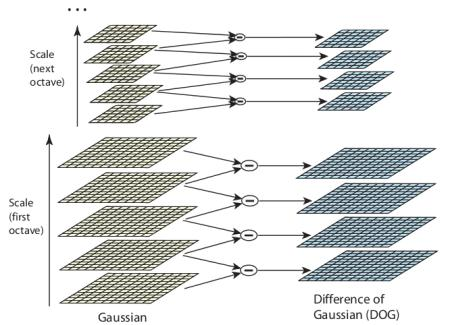

We then need to find local extrema in the DoG both in space and across different scale. We do that by checking the 26 pixel neighborhood around a pixel. We consider the 8 pixels neighborhood around a specific level of the DoG as well as the 9 pixel neighborhood of the level above and below. If that pixel contains a local maxima or minima, we mark that as a keypoint. Finally a pruning step is made to remove the low contrast keypoint.

Let's see an example of this!

Text(0.5, 1.0, 'Target Image')

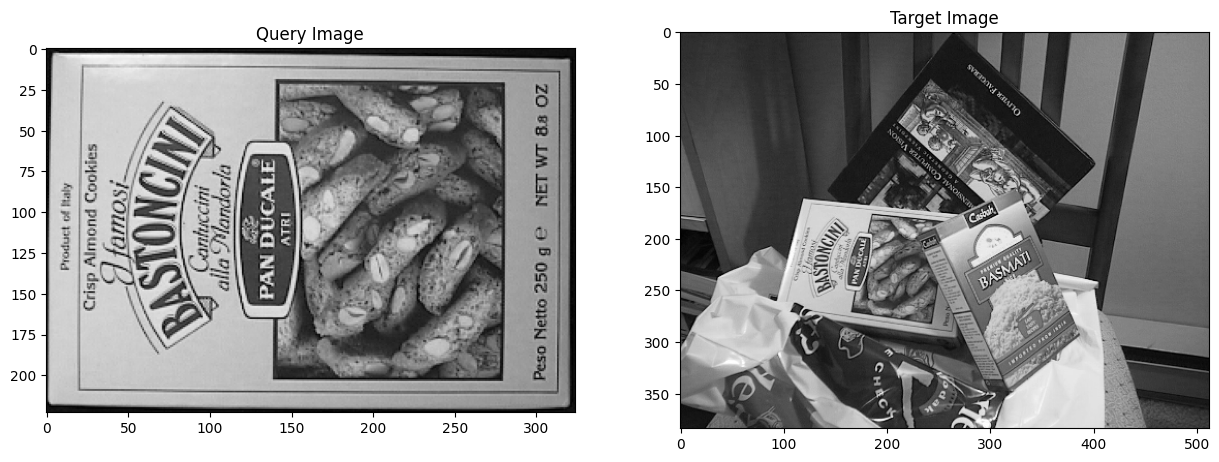

In [5]:
# let's import our two images for this part of the lab
# img_q will be the query image that we would like to recognize/detect/match in the target image

img_q = cv2.imread("Lab2-CV-course-HH/box.png",cv2.IMREAD_GRAYSCALE)
img_t = cv2.imread("Lab2-CV-course-HH/box_in_scene.png",cv2.IMREAD_GRAYSCALE)

#ok so let's check them! 

fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img_q,cmap="gray")
ax.set_title('Query Image')
ax = fig.add_subplot(1,2,2)
plt.imshow(img_t,cmap="gray")
ax.set_title("Target Image")



As you can see in this section we will be trying to find in the target image, this box of cookies. both instances of the same object differ in scale, orientation and illumination, furthermore, the target image has some partial oclusion and a different perspective.

Now let's find our keypoints

SIFT found 604 keypoints in the query image and 969 keypoints in the target image


Text(0.5, 1.0, 'Keypoints in Target Image')

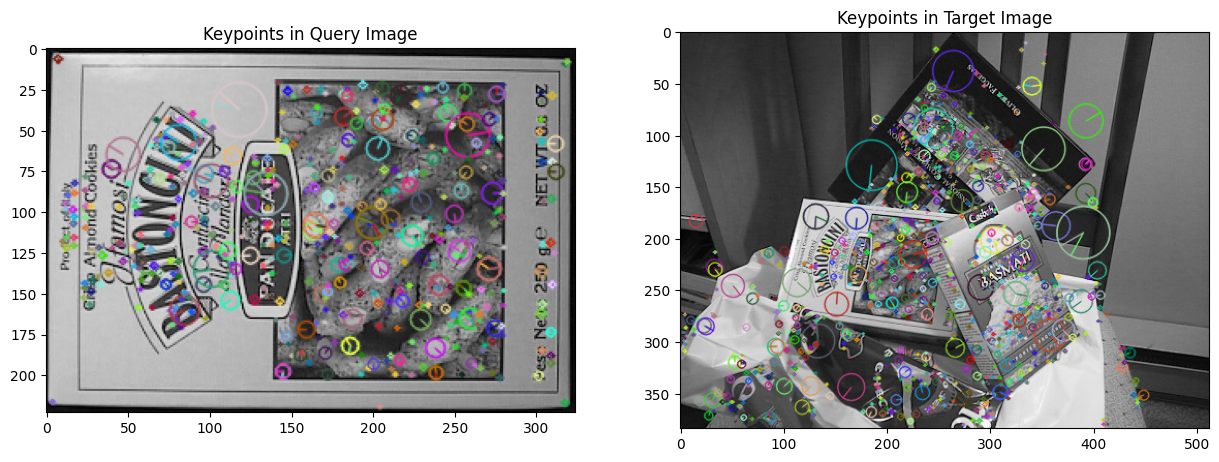

In [14]:
# we create an instance for our detector

sift = cv2.SIFT_create()

kp_q = sift.detect(img_q,None)
kp_t = sift.detect(img_t,None)

print("SIFT found {} keypoints in the query image and {} keypoints in the target image".format(len(kp_q),len(kp_t)))

# we can draw our keypoints in the images too
img_kpq = img_q.copy()
img_kpt = img_t.copy()
img_kpq = cv2.drawKeypoints(img_q,kp_q,img_kpq, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kpt = cv2.drawKeypoints(img_t,kp_t,img_kpt, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img_kpq,cmap="gray")
ax.set_title('Keypoints in Query Image')
ax = fig.add_subplot(1,2,2)
plt.imshow(img_kpt,cmap="gray")
ax.set_title("Keypoints in Target Image")


We can see that the number of keypoints varied a lot between images, which makes sence due to the difference in size and complexity. We can also see that in both pictures the keypoint detection algorithm detected several keypoints in our cookie box. Now it begs the question.... how can we match all these different keypoints?

###### **Feature description: SIFT**

In [ ]:
###### **Keypoint detection: Difference of Gaussians (DoG)**

In [4]:
print(cv2.__version__)

4.4.0
